In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd
from sklearn.model_selection import train_test_split 

In [2]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
one_hot_encoding_insurance=pd.get_dummies(insurance)
one_hot_encoding_insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [4]:
X=one_hot_encoding_insurance.drop("charges",axis=1)
y=one_hot_encoding_insurance["charges"]

In [5]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# 1.Now X and y values are created
# 2.Create training and testing
# 3.build neural network (like model 1 best fit model)

In [8]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,random_state=42,  
                                   test_size=0.2,  
                                   )
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [9]:
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                        metrics=["mae"]
                       )


In [10]:
history=insurance_model.fit(X_train,y_train,epochs=150)

Epoch 1/150



34/34 [==============================] - 4s 7ms/step - loss: 13164.7334 - mae: 13164.7334
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 12146.6484 - mae: 12146.6484
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 9043.0264 - mae: 9043.0264
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 7463.4521 - mae: 7463.4521
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 7394.7036 - mae: 7394.7036
Epoch 6/150
34/34 [==============================] - 0s 5ms/step - loss: 7329.5166 - mae: 7329.5166
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 7288.3638 - mae: 7288.3638
Epoch 8/150
34/34 [==============================] - 0s 4ms/step - loss: 7233.2632 - mae: 7233.2632
Epoch 9/150
34/34 [==============================] - 0s 4ms/step - loss: 7185.0835 - mae: 7185.0835
Epoch 10/150
34/34 [==============================] - 0s 4ms/step - loss: 7096.0210 - mae: 7096.0210
Epoch 1

34/34 [==============================] - 0s 4ms/step - loss: 3668.4368 - mae: 3668.4368
Epoch 83/150
34/34 [==============================] - 0s 4ms/step - loss: 3630.1946 - mae: 3630.1946
Epoch 84/150
34/34 [==============================] - 0s 5ms/step - loss: 3655.6021 - mae: 3655.6021
Epoch 85/150
34/34 [==============================] - 0s 4ms/step - loss: 3665.1350 - mae: 3665.1350
Epoch 86/150
34/34 [==============================] - 0s 6ms/step - loss: 3642.2231 - mae: 3642.2231
Epoch 87/150
34/34 [==============================] - 0s 6ms/step - loss: 3625.4004 - mae: 3625.4004
Epoch 88/150
34/34 [==============================] - 0s 5ms/step - loss: 3620.3506 - mae: 3620.3506
Epoch 89/150
34/34 [==============================] - 0s 5ms/step - loss: 3630.1853 - mae: 3630.1853
Epoch 90/150
34/34 [==============================] - 0s 4ms/step - loss: 3619.6763 - mae: 3619.6763
Epoch 91/150
34/34 [==============================] - 0s 5ms/step - loss: 3596.5002 - mae: 3596.5002
Epo

In [11]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3172.4563 - mae: 3172.4563


[3172.456298828125, 3172.456298828125]

Text(0.5, 0, 'epochs')

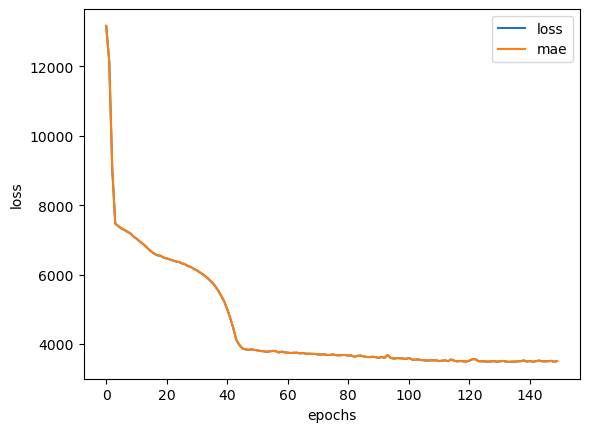

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")